In [169]:
import pandas as pd
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np


In [134]:
tracks = pd.read_csv('Data/fma_metadata/fma_metadata/tracks.csv', header=[0,1], index_col=0) #import using multilabel columns

In [135]:
ipd.display(tracks['track'].head())
ipd.display(tracks['album'].head())
ipd.display(tracks['artist'].head())
ipd.display(tracks['set'].head())

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,256000,0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album
20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album


,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
2,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN
3,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN
5,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN
10,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN
20,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN


,split,subset
track_id,,
2,training,small
3,training,medium
5,training,small
10,training,small
20,training,large


In [136]:
tracks = tracks[tracks['set', 'subset'] == 'small']
work_df_training = work_df[work_df['set', 'split'] =='training']
work_df_test = work_df[work_df['set', 'split'] =='test']


In [137]:
features = pd.read_csv('Data/fma_metadata/fma_metadata/features.csv', header=[0,1,2], index_col=0).loc[tracks.index]
features_training = features.loc[work_df_training.index]
features_test = features.loc[work_df_test.index]
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
140           0.533579 -0.623885 -1.086205 -1.081079 -0.765151 -0.072282   
141           0.172898 -0.284804 -1.169662 -1.062855 -0.706868 -0.708281   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
140        -0.882913 -0.582376 -0.884749 -0.645214  ...  0.157683  0.028070   
141        -0.204884  0.023624 -0.642770 -0.786291  ...  0.145994  0.024342   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
140         0.025946  11.052547  0.379395  0.052379  0.036621  0.001953   
141         0.032111  32.994659  0.415527  0.040267  0.034668  0.002930   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
5           2.193303  0.044861  
10          3.542325  0.040800  
140         3.143968  0.057712  
141         4.204097  0.028665  

[5 rows x 518 columns]

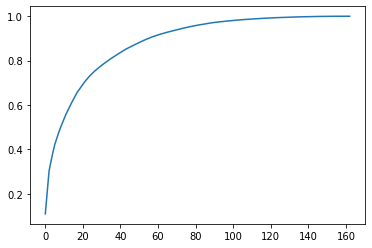

In [177]:
genres = pd.read_csv('Data/fma_metadata/fma_metadata/genres.csv')
genres_sorted = genres.sort_values(by='#tracks', ascending=False)

cdf = np.array(genres_sorted['#tracks']).cumsum()/np.array(genres_sorted['#tracks']).sum()

fig, axs= plt.subplots()
axs.plot(cdf)


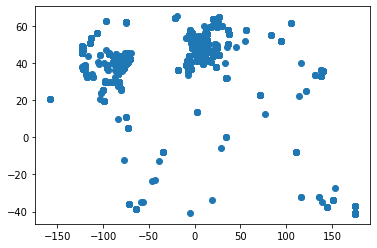

In [185]:
plt.scatter(tracks['artist', 'longitude'], tracks['artist', 'latitude'])

In [165]:
x_train = features_training
x_test = features_test
y_train = work_df_training['track', 'genre_top']
y_test = work_df_test['track', 'genre_top']

scaler = StandardScaler(copy=False)
scaler.fit_transform(x_train)
scaler.transform(x_test)

pca = PCA(n_components=10)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)





In [159]:
classifier = SVC()
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)

In [160]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.predict(x_test)

array(['Pop', 'Hip-Hop', 'Electronic', 'Hip-Hop', 'Electronic', 'Hip-Hop',
       'Hip-Hop', 'Instrumental', 'Instrumental', 'Hip-Hop', 'Electronic',
       'Rock', 'Hip-Hop', 'Experimental', 'Pop', 'Rock', 'International',
       'International', 'Electronic', 'Electronic', 'Instrumental',
       'Experimental', 'Electronic', 'Electronic', 'Instrumental',
       'Electronic', 'International', 'Electronic', 'Folk',
       'Experimental', 'Electronic', 'Experimental', 'Experimental',
       'International', 'International', 'Experimental', 'Pop', 'Folk',
       'Rock', 'Folk', 'Instrumental', 'International', 'Rock',
       'International', 'Folk', 'Pop', 'Experimental', 'Instrumental',
       'International', 'Pop', 'International', 'Rock', 'Pop',
       'International', 'International', 'Folk', 'International',
       'International', 'Experimental', 'International', 'Pop',
       'Experimental', 'Pop', 'Hip-Hop', 'Folk', 'Folk', 'Pop', 'Folk',
       'International', 'Rock', 'Folk', 